In [1]:
import pandas as pd
import seaborn as sns

insurance = pd.read_csv("../Data/insurance.csv")

In [2]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [12]:
insurance['charges'].quantile(.88)

30121.281617199995

### Exploring the Target

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Count'>

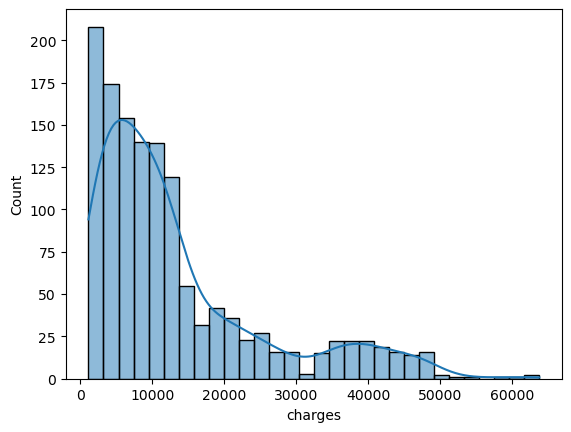

In [7]:
sns.histplot(insurance["charges"], kde=True)

<Axes: xlabel='charges'>

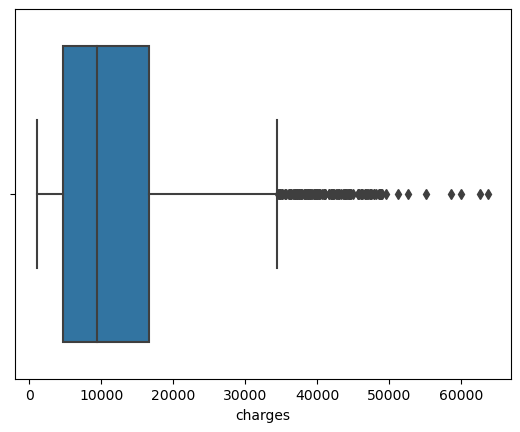

In [8]:
sns.boxplot(x=insurance["charges"])

c:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges'>

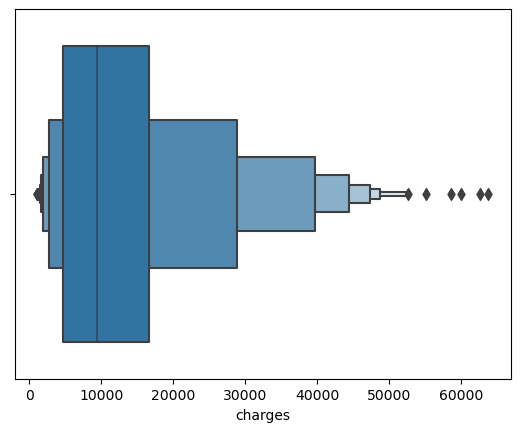

In [13]:
sns.boxenplot(x=insurance["charges"])

Boxenplot (letter-value plot) – tai išplėstinė boxplot versija, skirta dideliems duomenų kiekiams.
Ji rodo daugiau pasiskirstymo lygių, ypač uodegose.
Kaip skaityti grafiko dalis

Tamsesnė centrinė dėžė
→ Mediana ir artimiausi kvartiliai

Keli išoriniai „laiptai“ (dėžės)
→ Detalus duomenų pasiskirstymas (oktliai, kvantiliai)

Dešinėje matomi taškai
→ Outlieriai (labai didelės charges reikšmės)

Kodėl čia geriau nei paprastas boxplot

Boxplot: rodo tik Q1–Q3 ir outlierius

Boxenplot:

geriau atskleidžia uodegas ir nepaslepia struktūros, kai duomenų daug

tinkamas draudimo, pajamų, kainų analizei

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

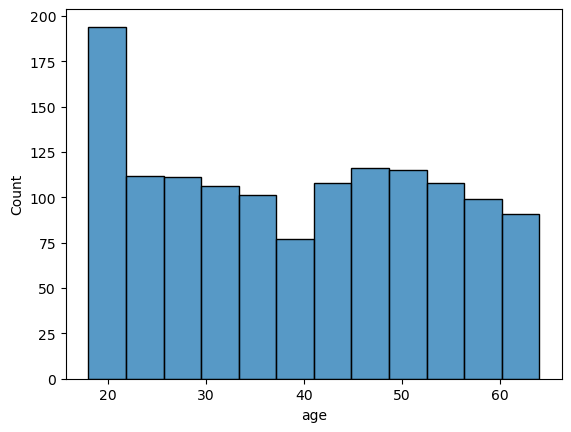

In [14]:
sns.histplot(x=insurance["age"])

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Count'>

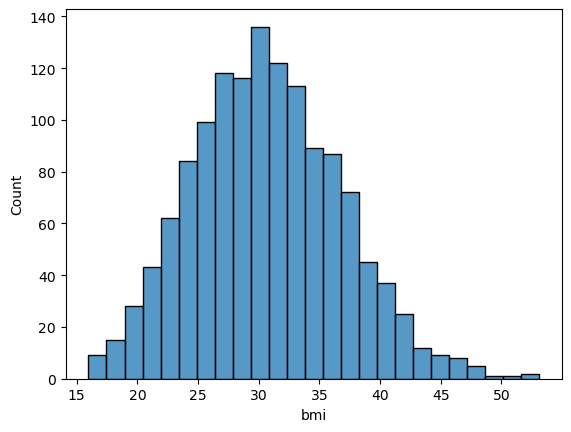

In [15]:
sns.histplot(x=insurance["bmi"])

In [16]:
insurance["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker'>

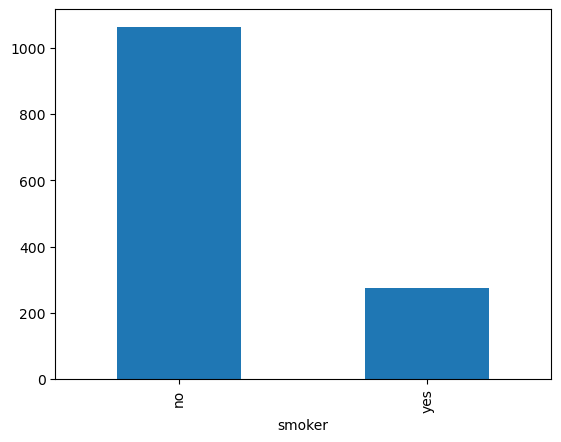

In [17]:
insurance["smoker"].value_counts().plot.bar()

<Axes: xlabel='region'>

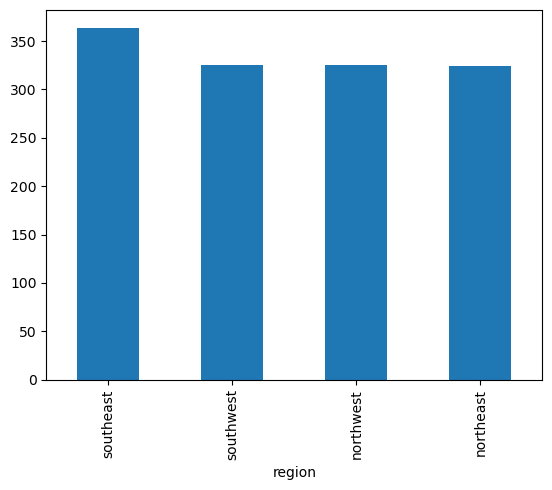

In [18]:
insurance["region"].value_counts().plot.bar()

In [19]:
insurance["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='sex'>

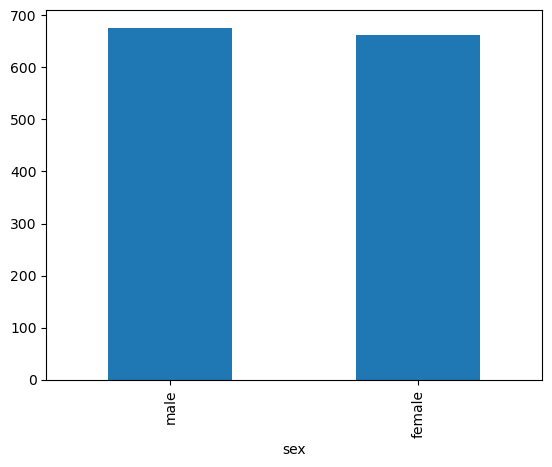

In [20]:
insurance["sex"].value_counts().plot.bar()

### Linear Relationships

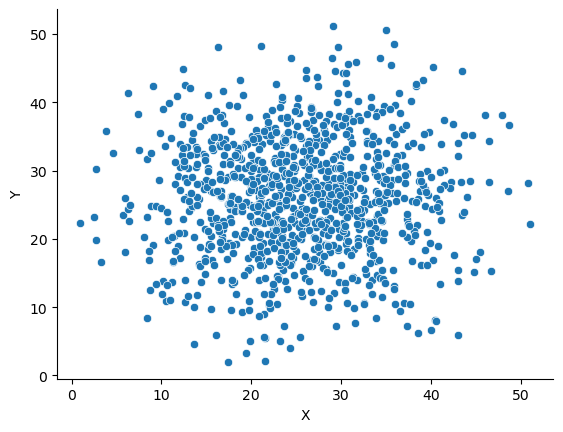

In [34]:
import numpy as np
import seaborn as sns

xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.06  # correlation KEISTI
covs = [
    [stds[0]**2, stds[0]*stds[1]*corr], 
    [stds[0]*stds[1]*corr, stds[1]**2]
] 

m = np.random.multivariate_normal(means, covs, 1000).T

import pandas as pd

df = pd.DataFrame(m).T
df.columns = ["X", "Y"]
df.head()

sns.scatterplot(df, x="X", y="Y")

sns.despine()

## Insurance

In [30]:
insurance[["charges", "age"]].corr()

,charges,age
charges,1.000000,0.299008
age,0.299008,1.000000


In [32]:
insurance.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

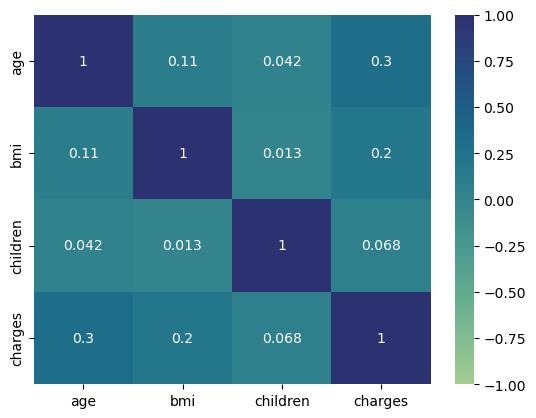

In [33]:
sns.heatmap(insurance.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="crest")

### Feature-Target Relationships

<Axes: xlabel='age', ylabel='charges'>

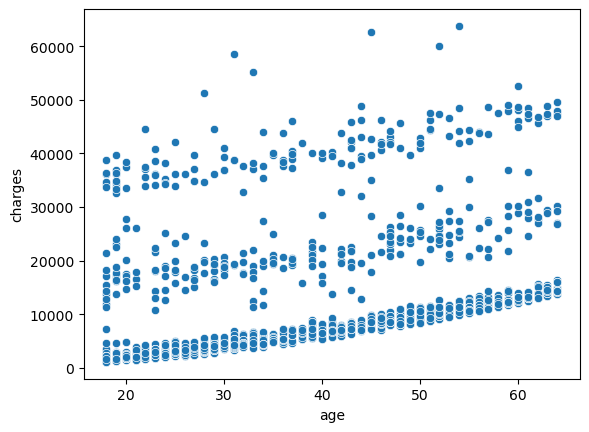

In [35]:
sns.scatterplot(insurance, x="age", y="charges")

c:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges'>

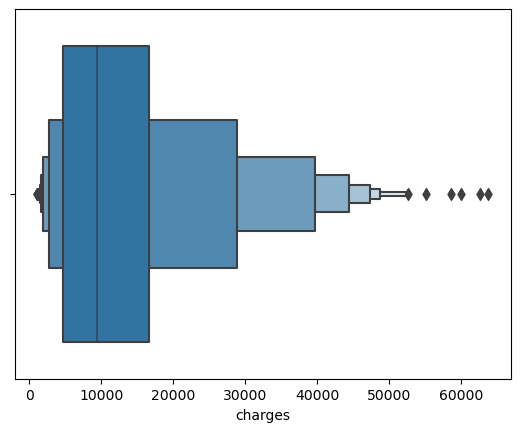

In [36]:
sns.boxenplot(x=insurance["charges"])

<Axes: xlabel='age', ylabel='charges'>

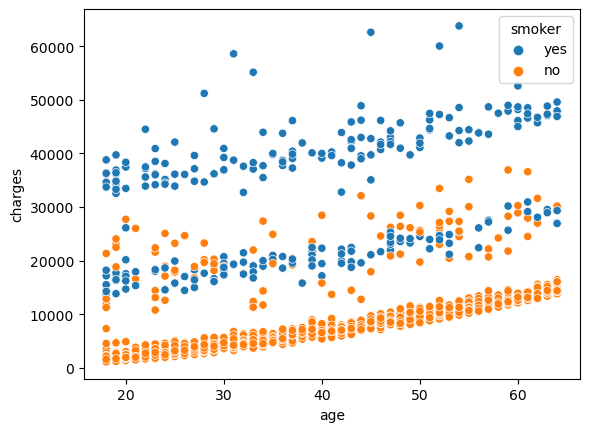

In [37]:
sns.scatterplot(insurance, x="age", y="charges", hue="smoker")

<Axes: xlabel='smoker'>

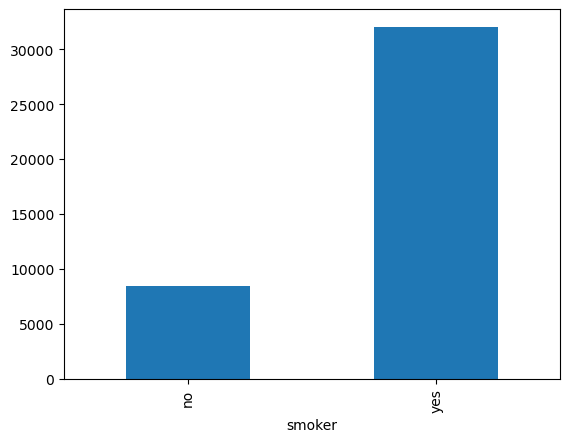

In [38]:
insurance.groupby("smoker")["charges"].mean().plot.bar()

### Feature-Feature Relationships

<Axes: xlabel='age', ylabel='bmi'>

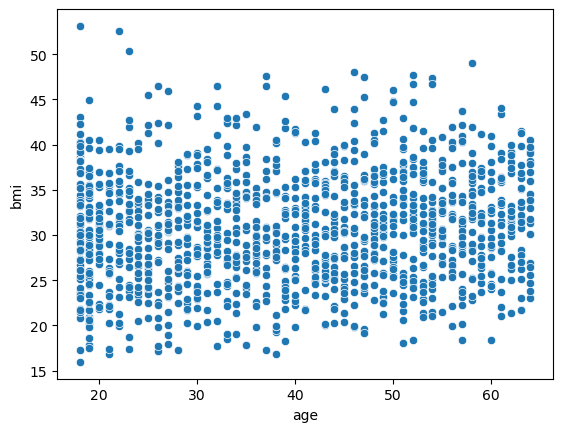

In [39]:
sns.scatterplot(insurance, x="age", y="bmi")

<Axes: xlabel='smoker'>

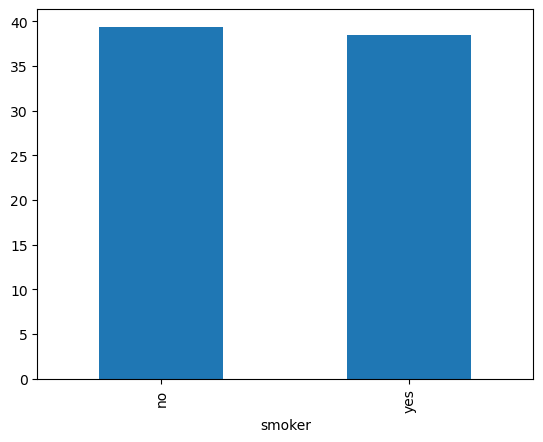

In [40]:
insurance.groupby("smoker")["age"].mean().plot.bar()

<Axes: xlabel='smoker'>

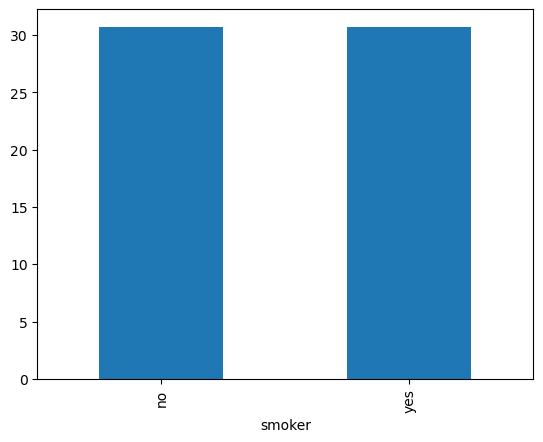

In [41]:
insurance.groupby("smoker")["bmi"].mean().plot.bar()

### Pairplots & LMPlots

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

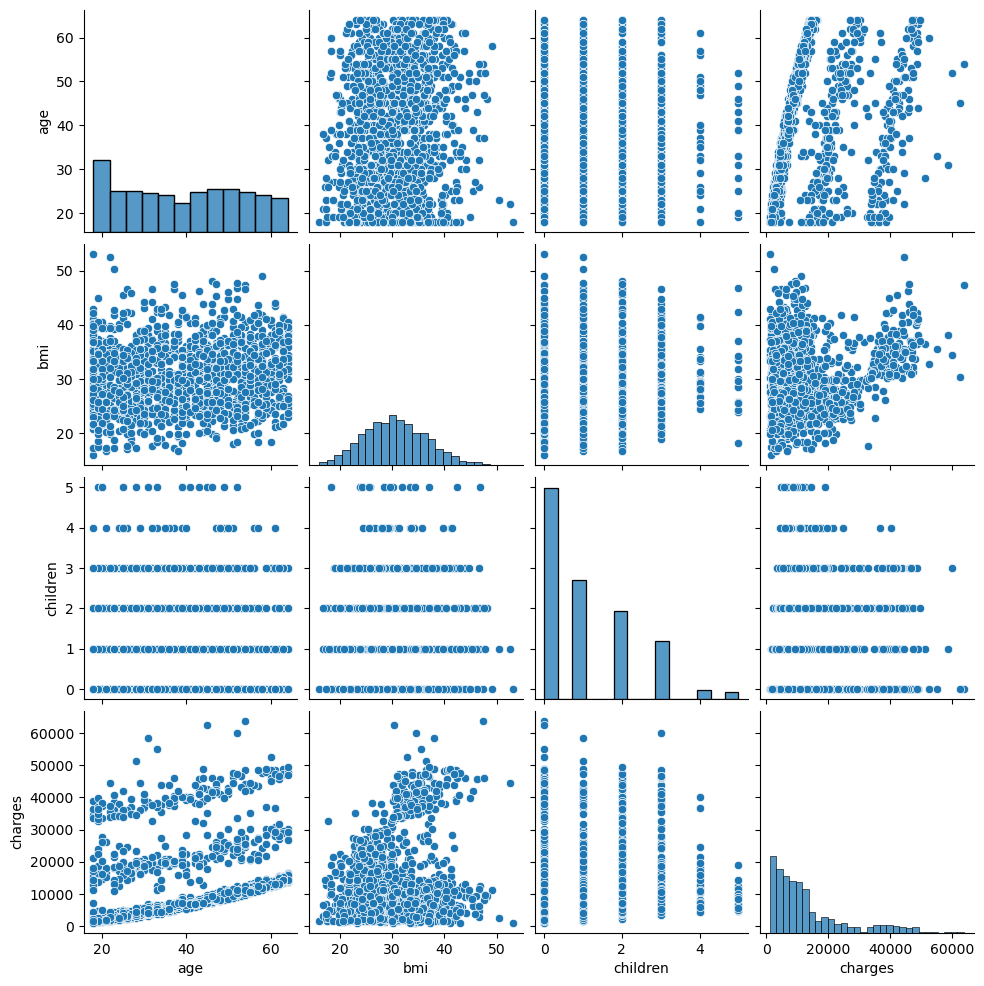

In [42]:
sns.pairplot(insurance)

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

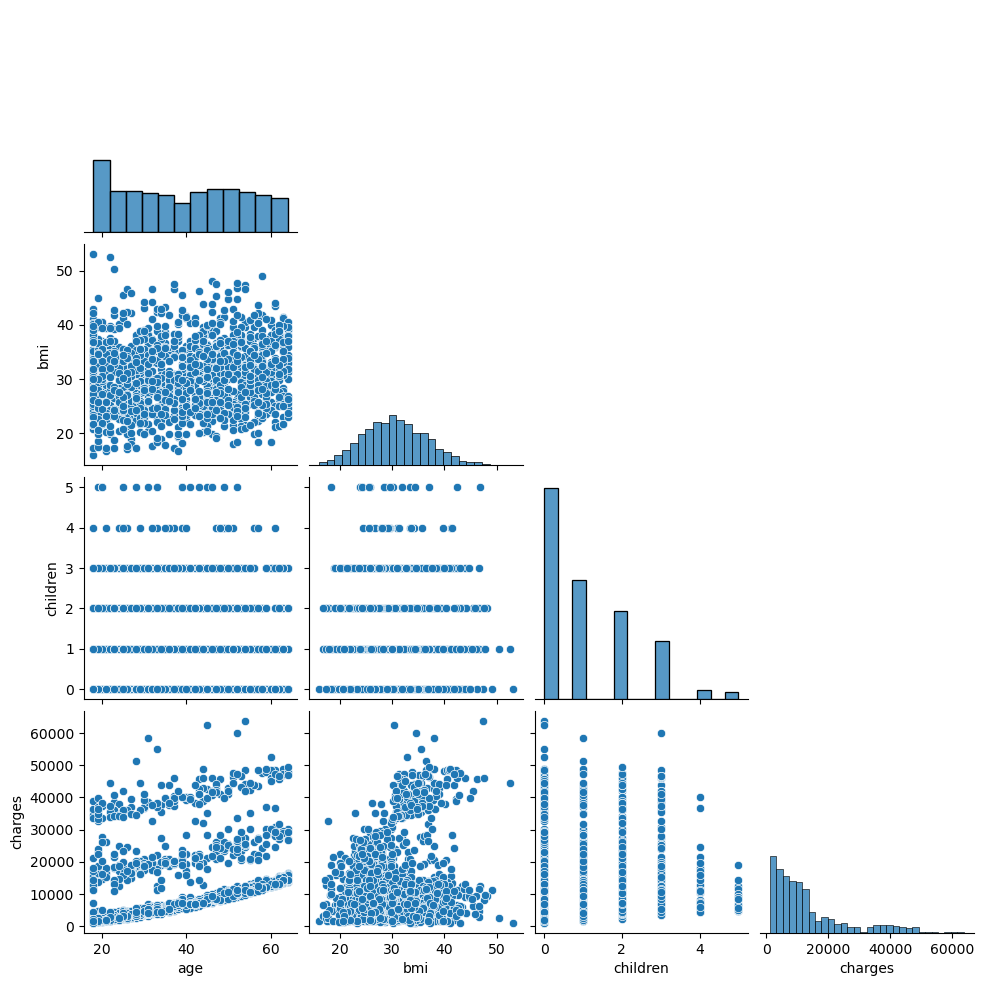

In [43]:
sns.pairplot(insurance, corner=True)

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

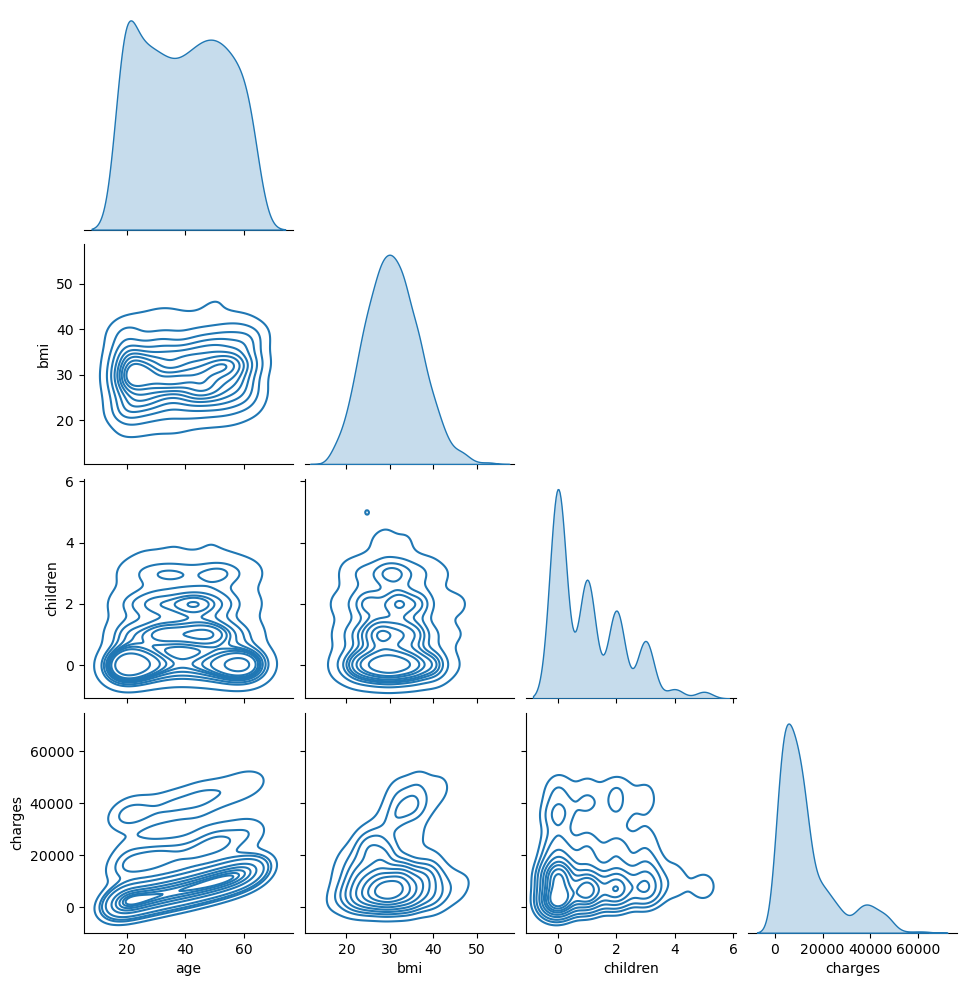

In [44]:
sns.pairplot(insurance, corner=True, kind="kde")

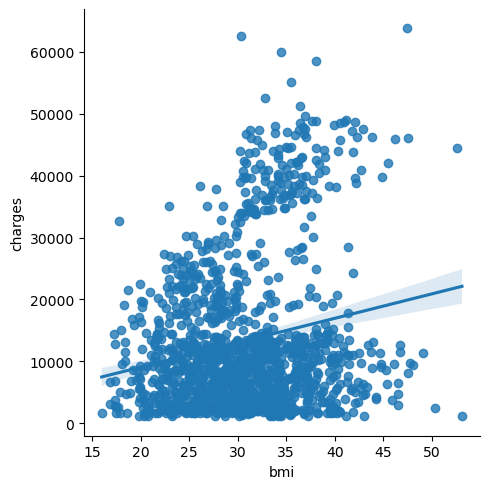

In [45]:
sns.lmplot(insurance, x="bmi", y="charges")

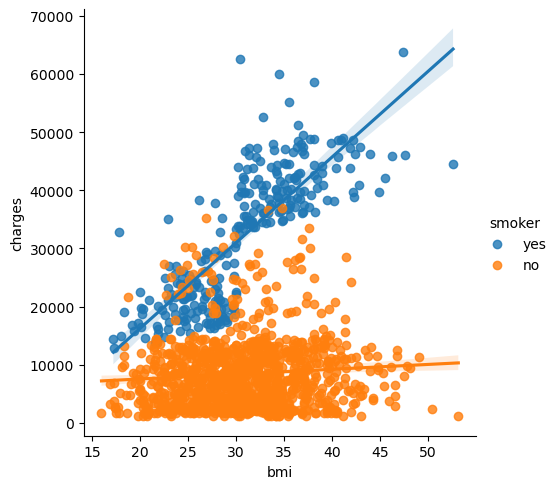

In [46]:
sns.lmplot(insurance, x="bmi", y="charges", hue="smoker")